In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
sns.set_style('whitegrid')




import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
#from sklearn.metrics import accuracy_score, classification_report,confusion_
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')




In [2]:
# Importing the dataset
df =pd.read_csv('../input/spam-mails-dataset/spam_ham_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace = True)


In [5]:
#Let's change the names of the columns according to their significance
df.columns = ['label', 'email', 'class']

In [6]:
df.head(10)

,label,email,class
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,ham,Subject: ehronline web address change\r\nthis ...,0
6,ham,Subject: spring savings certificate - take 30 ...,0
7,spam,Subject: looking for medication ? we ` re the ...,1
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [7]:
# No NaN in the dataset
df.isna().sum()

label    0
email    0
class    0
dtype: int64

In [8]:
df.shape

(5171, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   email   5171 non-null   object
 2   class   5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [10]:
df.isnull().sum()

label    0
email    0
class    0
dtype: int64

In [11]:
# • Let’s Check how many many email is spam and how many Ham
df['class'].value_counts()

0    3672
1    1499
Name: class, dtype: int64

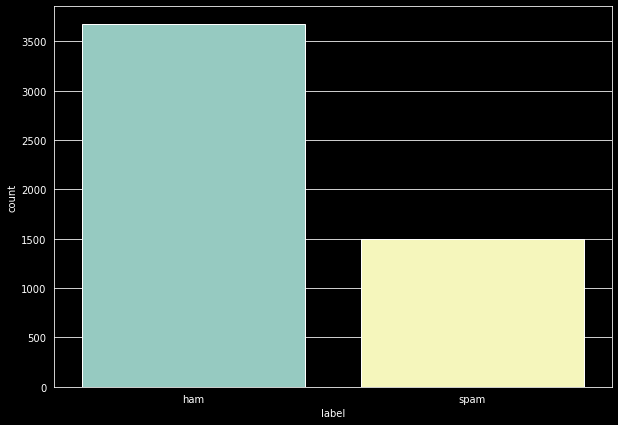

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(10,7))
sns.countplot(data=df,x="label")

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
import pandas as pd
from nltk.tokenize import word_tokenize

# Load the dataset
df = pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')

# Define the counts_words function
def counts_words(text):
    words = word_tokenize(text)
    return len(words)

# Apply the counts_words function to the 'text' column and create a new 'count' column
df['count'] = df['text'].apply(counts_words)

# Print the 'count' column
print(df['count'])


0        68
1        24
2       551
3        49
4        71
       ... 
5166    156
5167    306
5168     79
5169    112
5170    200
Name: count, Length: 5171, dtype: int64


In [21]:
df.groupby('label_num')['count'].mean()

label_num
0    226.239107
1    236.387592
Name: count, dtype: float64

In [22]:
from nltk.tokenize import RegexpTokenizer
def clean_str(string, reg= RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string=string.lower()
    tokens=RegexTokenizer(string)
    return " ".join(tokens)
print('Before Cleaning')
df.head()

Before Cleaning


,Unnamed: 0,label,text,label_num,count
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,68
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,24
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,551
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,49
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,71


In [23]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import RegexpTokenizer

print('After Cleaning')
tokenizer = RegexpTokenizer(r'[a-z]+')
df['text'] = df['text'].apply(lambda string: " ".join(tokenizer.tokenize(string.lower())))
print(df.head())


After Cleaning
   Unnamed: 0 label                                               text  \
0         605   ham  subject enron methanol meter this is a follow ...   
1        2349   ham  subject hpl nom for january see attached file ...   
2        3624   ham  subject neon retreat ho ho ho we re around to ...   
3        4685  spam  subject photoshop windows office cheap main tr...   
4        2030   ham  subject re indian springs this deal is to book...   

   label_num  count  
0          0     68  
1          0     24  
2          0    551  
3          1     49  
4          0     71  


In [26]:
# Remove 'subject' from the email text
df['text'] = [ ' '.join([item for item in x.split() if item != 'subject']) for x in df['text']]
df.head()


,Unnamed: 0,label,text,label_num,count
0,605,ham,enron methanol meter this is a follow up to th...,0,68
1,2349,ham,hpl nom for january see attached file hplnol x...,0,24
2,3624,ham,neon retreat ho ho ho we re around to that mos...,0,551
3,4685,spam,photoshop windows office cheap main trending a...,1,49
4,2030,ham,re indian springs this deal is to book the tec...,0,71


In [27]:
# Import the PorterStemmer class from the nltk.stem module.
# The PorterStemmer class is used to stem words. Stemming is the process of␣
# ↪reducing a word to its root form.

from nltk.stem import PorterStemmer
# Create a PorterStemmer object.
# The PorterStemmer object is used to stem words.
stemmer=PorterStemmer()


In [28]:
# Define the `stemming()` function.
# The `stemming()` function takes a string as input and returns a stemmed␣version of the string.
# The function first splits the string into a list of words.
# It then uses the `stemmer.stem()` method to stem each word in the list.
# Finally, it returns the list of stemmed words as a single string

def stemming(text):
    return "".join([stemmer.stem(word) for word in text])

df['text'] = df['text'].apply(stemming)
df.head()

,Unnamed: 0,label,text,label_num,count
0,605,ham,enron methanol meter this is a follow up to th...,0,68
1,2349,ham,hpl nom for january see attached file hplnol x...,0,24
2,3624,ham,neon retreat ho ho ho we re around to that mos...,0,551
3,4685,spam,photoshop windows office cheap main trending a...,1,49
4,2030,ham,re indian springs this deal is to book the tec...,0,71


In [30]:
# • Spliting Into dependent and independent varaiable
X=df.loc[:,'text']
y=df.loc[:,'label_num']

X.shape, y.shape

((5171,), (5171,))

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
#create counter Vectorized object

cv=CountVectorizer()
X = cv.fit_transform(df.text)
y = df.label

In [33]:
# # 6 5.0 Model Training
# # Split the data into a training set and a test set.
# # The training set will contain 80% of the data and the test set will contain␣
# ↪20% of the data.
# # The `random_state` argument is used to ensure that the data is split randomly␣
# ↪each time the code is run.

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

# # Create a dictionary of models, where the keys are the names of the models and␣
# ↪the values are the models themselves.
# # The models are created using the `RandomForestClassifier()`,␣
# ↪`GradientBoostingClassifier()`, `MultinomialNB()`, `LogisticRegression()`,␣
# ↪`KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LinearSVC()`, and␣
# ↪`SVC()` classes



In [34]:
models = {
"Random Forest": {"model":RandomForestClassifier(), "perf":0},
"Gradient Boosting": {"model":GradientBoostingClassifier(), "perf":0},
"MultinomialNB": {"model":MultinomialNB(), "perf":0},
"Logistic Regr.": {"model":LogisticRegression(), "perf":0},
"KNN": {"model":KNeighborsClassifier(), "perf":0},
"Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
"SVM (Linear)": {"model":LinearSVC(), "perf":0},
"SVM (RBF)": {"model":SVC(), "perf":0}
}

In [35]:
# # For each model in the dictionary, train the model on the training set and␣
# ↪measure the time it takes to train the model.
# # Print the name of the model and the time it took to train the model

for name, model in models.items():
    # start a timer
    start=perf_counter()
    # Fit the model on the training set.
    model['model'].fit(X_train, y_train)
    # Calculate the time it took to train the model.
    duration= perf_counter() - start
    # Round the time to two decimal places.
    duration = round(duration,2)
    model["perf"] = duration
    # Print the name of the model and the time it took to train the model.
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 5.62 sec
Gradient Boosting    trained in 20.48 sec
MultinomialNB        trained in 0.03 sec
Logistic Regr.       trained in 0.89 sec
KNN                  trained in 0.01 sec
Decision Tree        trained in 0.91 sec
SVM (Linear)         trained in 0.33 sec
SVM (RBF)            trained in 5.49 sec


In [36]:
# 5.2 Model Accuracy

models_accuracy=[]
# Iterate over the dictionary of models.
for name, model in models.items():
    # Calculate the accuracy of the model on the test set.
    accuracy=model['model'].score(X_test, y_test)
    # Append a tuple to the `models_accuracy` list.
    models_accuracy.append([name, accuracy, model["perf"]])
    

# Create an empty list called `models_accuracy1`.
models_accuracy1 = []
# Iterate over the dictionary of models.
for name, model in models.items():
    # Calculate the accuracy of the model on the training set.
    accuracy = model["model"].score(X_train, y_train)

    models_accuracy1.append([name, accuracy, model["perf"]])
    
    
# Create a Pandas DataFrame from the `models_accuracy` list.
df_accuracy = pd.DataFrame(models_accuracy)
# Set the column names of the DataFrame.
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
# Sort the DataFrame by the `Test Accuracy` column in descending order.
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
# Reset the index of the DataFrame.
df_accuracy.reset_index(drop = True, inplace=True)
# Print the DataFrame.
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,MultinomialNB,0.976812,0.03
1,Logistic Regr.,0.973913,0.89
2,Random Forest,0.967150,5.62
3,SVM (Linear),0.963285,0.33
4,Gradient Boosting,0.958454,20.48
5,Decision Tree,0.958454,0.91
6,SVM (RBF),0.957488,5.49
7,KNN,0.867633,0.01


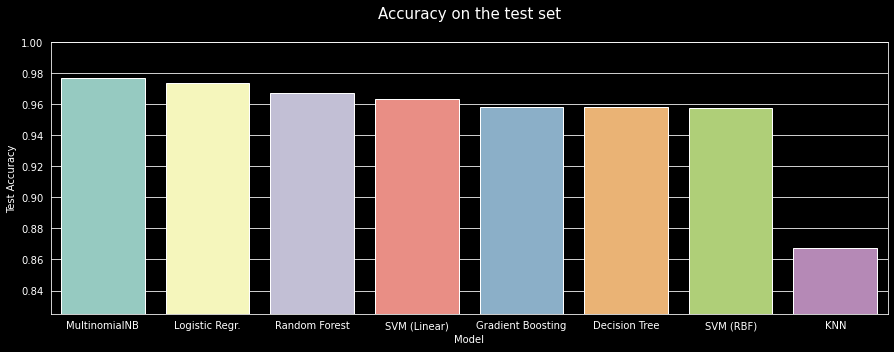

In [37]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

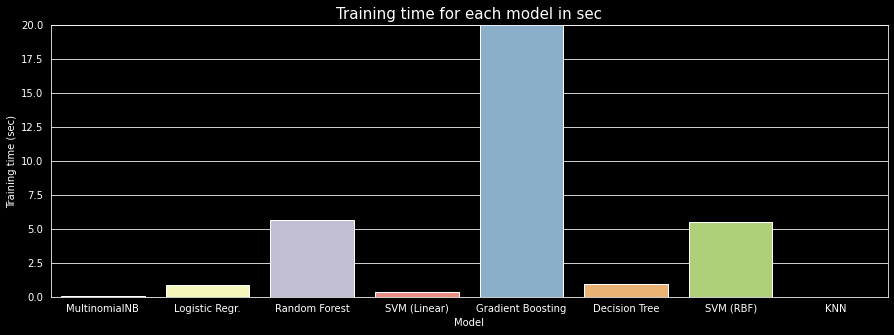

In [38]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_accuracy)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,20)
plt.show()

In [40]:
!pip install scikit-learn


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [42]:
#import multinomialNB class from sklearn.Naives bayes Library
from sklearn.naive_bayes import MultinomialNB


# Import the GridSearchCV class from the sklearn.model_selection library.
from sklearn.model_selection import GridSearchCV
#create dictionary to search over
parameters={"alpha": [0.2, 1, 2, 5, 10], "fit_prior":[True, False]}

# Create a dictionary of hyperparameters to search over.
parameters = {"alpha": [0.2, 1, 2, 5, 10], "fit_prior": [True, False]}
# Create a GridSearchCV object.
grid = GridSearchCV(MultinomialNB(), param_grid=parameters)
# Fit the GridSearchCV object to the training data.
grid.fit(X_train, y_train)
# Create a DataFrame of the GridSearchCV results.
df_results = pd.DataFrame(grid.cv_results_)
# Select the `params` and `mean_test_score` columns from the DataFrame.
df_results = df_results[['params', 'mean_test_score']]
# Sort the DataFrame by the `mean_test_score` column in descending order.
df_results.sort_values(by='mean_test_score', ascending=False, inplace=True)
# Print the DataFrame.
print(df_results)

                               params  mean_test_score
1  {'alpha': 0.2, 'fit_prior': False}         0.981867
3    {'alpha': 1, 'fit_prior': False}         0.981867
0   {'alpha': 0.2, 'fit_prior': True}         0.981383
2     {'alpha': 1, 'fit_prior': True}         0.979932
5    {'alpha': 2, 'fit_prior': False}         0.973889
4     {'alpha': 2, 'fit_prior': True}         0.970987
7    {'alpha': 5, 'fit_prior': False}         0.943427
6     {'alpha': 5, 'fit_prior': True}         0.937624
9   {'alpha': 10, 'fit_prior': False}         0.896523
8    {'alpha': 10, 'fit_prior': True}         0.886368


In [43]:
grid.best_params_

{'alpha': 0.2, 'fit_prior': False}

In [45]:
# Import the MultinomialNB class from the sklearn.naive_bayes library.
from sklearn.naive_bayes import MultinomialNB
# Get the best hyperparameters from the GridSearchCV object.
alpha, fit_prior = grid.best_params_['alpha'], grid.best_params_['fit_prior']
# Create a MultinomialNB model with the best hyperparameters.
model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)
# Fit the model to the training data.
model.fit(X_train, y_train)
# Predict the labels of the test data.
y_pred = model.predict(X_test)
# Import the classification_report and accuracy_score functions from the sklearn.metrics library.
from sklearn.metrics import classification_report, accuracy_score
# Print the classification report.
print(classification_report(y_test, y_pred))
# Print the accuracy score.
print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 3) * 100}%')


              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       732
        spam       0.95      0.96      0.96       303

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035

Accuracy: 97.6%


In [49]:
def display_result(df, number=2):
    """
    Displays the results of the spam classifier on a given number of emails.
    Args:
    df: The DataFrame containing the emails.
    number: The number of emails to display.
    Returns:
    None.
    """
    # Iterate over the first `number` emails in the DataFrame.
    for i in range(number):
        # Get the email text and label.
        msg = df['text'].iloc[i]
        label = df["label"].iloc[i]
        # Convert the email text to a vector.
        msg_vec = cv.transform([msg])
        # Predict the label of the email.
        pred_label = model.predict(msg_vec)
        # Print the real and predicted labels.
        print(f"**Real: {label}, Predicted: {pred_label[0]}**")
        # Print the email text.
        print(f"**E-Mail:** {msg}")
        # Print a separator between emails.
        print("_______________________________________________________________")

# Get the spam and ham emails.
df_spam = df[df['label'] == 'spam']
df_ham = df[df['label'] == 'ham']

# Display the results for the spam emails.
display_result(df_spam)

# Display the results for the ham emails.
display_result(df_ham)


**Real: spam, Predicted: spam**
**E-Mail:** photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin
_______________________________________________________________
**Real: spam, Predicted: spam**
**E-Mail:** looking for medication we re the best source it is difficult to make our material condition better by the best law but it is easy enough to ruin it by bad laws excuse me you just found the best and simpliest site for medication on the net no perscription easy delivery private secure and easy better see rightly on a pound a week than squint on a million we ve got anything that you will ever want erection treatment pills anti depressant pills weight loss and 